In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm, boxcox, chi2

In [2]:
#1
def qq_plot(xj): #assume input is a list/array
    xj.sort()
    j=np.array(range(len(xj)))+1
    below_xj=(j-1/2)/len(xj)
    qj=norm.ppf(below_xj)
    plt.plot(qj,xj) #plot Q-Q plot
    m, b = np.polyfit(qj, xj, 1)
    plt.plot(qj, m*qj+b) #plot reference line
    plt.title('Q-Q Plot')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')

In [3]:
#2
car_prices=pd.DataFrame({'x1':[3,5,5,7,7,7,8,9,10,11],'x2':[2.3,1.9,1.0,0.7,0.3,1.0,1.05,0.45,0.7,0.3]})
car_prices

,x1,x2
0,3,2.30
1,5,1.90
2,5,1.00
3,7,0.70
4,7,0.30
5,7,1.00
6,8,1.05
7,9,0.45
8,10,0.70
9,11,0.30


In [4]:
#(a) Box-Cox transformation for x1
transform1, lambda1= boxcox(car_prices['x1'],lmbda=None)
print("transformed variables: ", transform1, "\nlambda: ",lambda1)

transformed variables:  [1.99357154 3.97994271 3.97994271 5.96225561 5.96225561 5.96225561
 6.95229389 7.9417156  8.93058988 9.91897192] 
lambda:  0.9950293497559268


In [5]:
#(b) Box-Cox transformation for x2
transform2, lambda2 = boxcox(car_prices['x2'],lmbda=None)
print("transformed variables: ", transform2, "\nlambda: ",lambda2)

transformed variables:  [ 0.83302984  0.64192557  0.         -0.35665281 -1.20372064  0.
  0.04879058 -0.79839677 -0.35665281 -1.20372064] 
lambda:  0.0003479745820106328


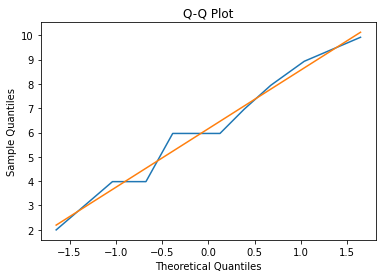

In [6]:
#(c) We can use the data obtained from each Box-Cox transformation to construct Q-Q plots using Python code in #1.
#x1
qq_plot(transform1)

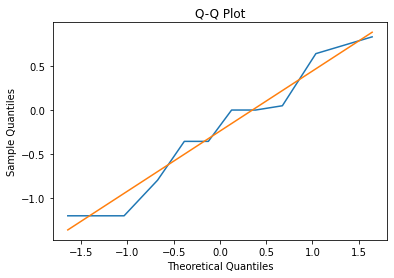

In [7]:
#x2
qq_plot(transform2)

In [8]:
#Comparing the two, we may say that the Q-Q plot obtained from 'x1' data after Box-Cox transformation is closer to a straight line than 'x2'.
#Thus, 'x1' is closer to a normal distribution than 'x2'.

In [9]:
#3
def mean_vector(data):
    ones=pd.DataFrame({'ones': np.ones(len(data))})
    mean=ones.transpose().dot(data)/len(data)
    return mean

In [10]:
def covariance_matrix(data):
    mean=mean_vector(data)
    mean_rep = pd.concat([mean]*len(data))
    mean_rep.columns=data.columns
    mean_rep.reset_index(inplace = True, drop = True)
    covariance=(data-mean_rep).transpose().dot(data-mean_rep)/(len(data)-1)
    return covariance

In [11]:
def chisq_plot(data): #assume input is a dataframe
    dj=[]
    #sample covariance
    S_inv=pd.DataFrame(np.linalg.inv(covariance_matrix(data)), index=data.columns, columns=data.columns)
    #fill in values for dj
    for i in range(len(data)):
        diff=data.iloc[i]-mean_vector(data)
        val=((diff).dot(S_inv)).dot(diff.transpose())
        dj=np.append(dj,val)
    dj.sort()
    j=np.array(range(len(data)))+1
    below_dj=(j-1/2)/len(data)
    qj=chi2.ppf(below_dj, df=2)
    plt.plot(qj,dj) #plot Chi-Square Plot
    plt.plot(qj, qj) #plot reference line
    plt.title('Chi-Square Plot')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')

In [12]:
#4
college = pd.read_fwf("college.dat", header = None)
college.columns = ['X1','X2','X3'] #X1: Social Science and History, X2: Verbal, X3: Science
college

,X1,X2,X3
0,468,41,26
1,428,39,26
2,514,53,21
3,547,67,33
4,614,61,27
...,...,...,...
82,614,70,23
83,527,49,30
84,474,41,16
85,441,47,26


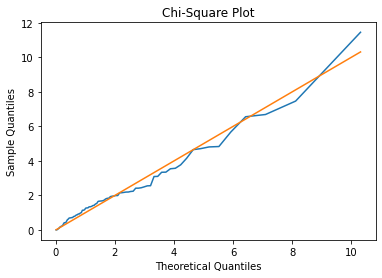

In [13]:
chisq_plot(college[['X1','X2']])

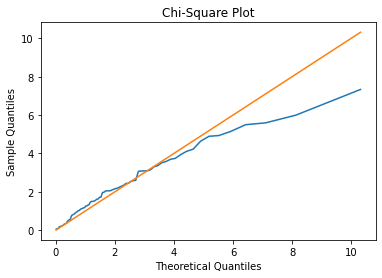

In [14]:
chisq_plot(college[['X1','X3']])

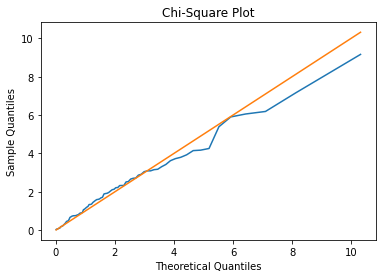

In [15]:
chisq_plot(college[['X2','X3']])

In [16]:
#If the data is from a multivariate normal distribution, each variable pair should have a bivariate normal distribution.
#Among the Chi-Square plots of each variable pair, the plot for (X1,X2) has the most resemblence to the reference line. Thus, it is the closest to a bivariate normal distribution.
#However, the other two plots deviate from the reference line, so it is difficult to say that they have a bivariate normal distribution.
#So we can conclude that the data does not have a multivariate normal distribution.